<a href="https://colab.research.google.com/github/VRAJPATEL81/Crowd_Density_AI4SEE/blob/main/Crowd_density_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VK9dNheJEhVc82ujhDKY")
project = rf.workspace("dent-detection-tsf5p").project("crowd_density_estimation")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # or use "yolov8s.pt" if you want better accuracy but longer training

# Train the model
model.train(
    data="/content/drive/MyDrive/Crowd_Density_Estimation-1/data.yaml",  # path to the dataset YAML file from Roboflow
    epochs=50,                 # slightly increased for better learning on 819 images
    imgsz=640,                 # standard input size (can adjust to 512 or 416 for speed)
    batch=16,                  # adjust based on available RAM/GPU in Colab
    name="crowd_density_model", # experiment name
    workers=2,                 # reduce to avoid memory issues on Colab
    device="cpu"              # Use CPU for training
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 129MB/s]


Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Crowd_Density_Estimation-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=2, project=None, name=crowd_density_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Crowd_Density_Estimation-1/train/labels... 1945 images, 1138 backgrounds, 0 corrupt: 100%|██████████| 1965/1965 [05:56<00:00,  5.51it/s]


train: New cache created: /content/drive/MyDrive/Crowd_Density_Estimation-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 47.4 KB)


val: Scanning /content/drive/MyDrive/Crowd_Density_Estimation-1/valid/labels... 82 images, 43 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:44<00:00,  1.85it/s]

val: New cache created: /content/drive/MyDrive/Crowd_Density_Estimation-1/valid/labels.cache


Plotting labels to runs/detect/crowd_density_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/crowd_density_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.9258      2.585       1.42         15        640: 100%|██████████| 123/123 [33:00<00:00, 16.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:31<00:00, 10.37s/it]

                   all         82         48      0.364      0.292       0.23      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.028      1.997      1.491         10        640: 100%|██████████| 123/123 [32:09<00:00, 15.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.82s/it]

                   all         82         48      0.414        0.5      0.359      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.057      1.802      1.531         25        640: 100%|██████████| 123/123 [31:55<00:00, 15.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:28<00:00,  9.59s/it]

                   all         82         48      0.236       0.29       0.18     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.058      1.755      1.534         27        640:  53%|█████▎    | 65/123 [16:53<15:05, 15.60s/it]

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VK9dNheJEhVc82ujhDKY")
project = rf.workspace("dent-detection-tsf5p").project("crowd_density_estimation")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

# Initiate a new training session
model = YOLO("yolov8n.pt")  # Using the base model for initial training

# Train the model
model.train(
    data="/content/drive/MyDrive/Crowd_Density_Estimation-1/data.yaml",  # path to the dataset YAML file from Roboflow
    epochs=50,                 # slightly increased for better learning on 819 images
    imgsz=640,                 # standard input size (can adjust to 512 or 416 for speed)
    batch=16,                  # adjust based on available RAM/GPU in Colab
    name="crowd_density_model", # experiment name
    workers=2,                 # reduce to avoid memory issues on Colab
    device="0",              # Use GPU for training this time
    project='runs/train' # Ensure the project is set to a directory that will be created/used
)

Ultralytics 8.3.111 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Crowd_Density_Estimation-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=runs/train, name=crowd_density_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 21.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 9.3±19.4 ms, read: 0.1±0.0 MB/s, size: 43.7 KB)


train: Scanning /content/drive/MyDrive/Crowd_Density_Estimation-1/train/labels.cache... 1945 images, 1138 backgrounds, 0 corrupt: 100%|██████████| 1965/1965 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.4 ms, read: 2.5±5.4 MB/s, size: 47.4 KB)


val: Scanning /content/drive/MyDrive/Crowd_Density_Estimation-1/valid/labels.cache... 82 images, 43 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<?, ?it/s]


Plotting labels to runs/train/crowd_density_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/crowd_density_model2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         2G     0.9225      2.564      1.415         23        640: 100%|██████████| 123/123 [06:11<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all         82         48      0.358      0.417      0.285      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.46G       1.03      1.964      1.497         12        640: 100%|██████████| 123/123 [00:45<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         82         48       0.48      0.375       0.33      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.46G      1.046      1.804      1.522         23        640: 100%|██████████| 123/123 [00:43<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         82         48      0.331      0.417      0.254      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.46G      1.107      1.706      1.568         23        640: 100%|██████████| 123/123 [00:43<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         82         48      0.356      0.333      0.248      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.46G     0.9885      1.563      1.471         15        640: 100%|██████████| 123/123 [00:43<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         82         48      0.408      0.396      0.337      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.46G     0.9438      1.482      1.437         13        640: 100%|██████████| 123/123 [00:43<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         82         48      0.494      0.438      0.472      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.46G     0.9026      1.458      1.418         16        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         82         48       0.52      0.521       0.45      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.46G     0.9009      1.383      1.399          9        640: 100%|██████████| 123/123 [00:42<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         82         48      0.496      0.542      0.498      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.46G      0.873      1.411      1.375          8        640: 100%|██████████| 123/123 [00:42<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         82         48      0.435      0.542      0.455      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.46G     0.8367      1.286       1.37          7        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         82         48      0.661      0.448      0.446      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.46G     0.8444      1.277      1.357         20        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         82         48      0.591      0.688       0.55       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.46G     0.8007       1.31      1.327         16        640: 100%|██████████| 123/123 [00:43<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         82         48      0.619      0.521       0.46      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.46G     0.7994      1.242      1.323         22        640: 100%|██████████| 123/123 [00:41<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         82         48      0.592      0.634      0.547      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.46G     0.7583      1.192      1.289         11        640: 100%|██████████| 123/123 [00:42<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         82         48      0.571      0.729       0.61      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.46G     0.7443      1.163      1.279          9        640: 100%|██████████| 123/123 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]


                   all         82         48      0.544      0.604      0.563      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.46G     0.7553      1.195      1.276         17        640: 100%|██████████| 123/123 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         82         48      0.384      0.542      0.488      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.46G     0.7226      1.137      1.259         26        640: 100%|██████████| 123/123 [00:43<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         82         48      0.564      0.688      0.649       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.46G     0.7213      1.108      1.268         16        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         82         48      0.481      0.714      0.614      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.46G     0.7004      1.078      1.241         14        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         82         48       0.65      0.583      0.624      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.46G     0.6936      1.058      1.253         14        640: 100%|██████████| 123/123 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         82         48      0.509      0.776       0.64      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.46G      0.714      1.102      1.247         18        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         82         48      0.541      0.663       0.58      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.46G     0.6811      1.082       1.23         19        640: 100%|██████████| 123/123 [00:42<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         82         48      0.575      0.604      0.602      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.46G     0.6795      1.043      1.216         17        640: 100%|██████████| 123/123 [00:43<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         82         48       0.64      0.778      0.677      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.46G     0.6616      1.008      1.211         25        640: 100%|██████████| 123/123 [00:43<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         82         48      0.554       0.75      0.652      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.46G     0.6399     0.9905      1.196         11        640: 100%|██████████| 123/123 [00:43<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]

                   all         82         48      0.638      0.771      0.721      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.46G     0.6316     0.9688      1.193         18        640: 100%|██████████| 123/123 [00:43<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]


                   all         82         48      0.492       0.75      0.585      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.46G     0.6191     0.9599      1.176         12        640: 100%|██████████| 123/123 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         82         48      0.567      0.771      0.704      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.46G     0.6252       0.95      1.174         18        640: 100%|██████████| 123/123 [00:43<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         82         48      0.544      0.572      0.607      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.46G     0.6144     0.9376       1.16         12        640: 100%|██████████| 123/123 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         82         48      0.553      0.812       0.68      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.46G      0.599     0.9119      1.164         12        640: 100%|██████████| 123/123 [00:43<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         82         48      0.558       0.75      0.645      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.46G     0.5807     0.8939      1.139         12        640: 100%|██████████| 123/123 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         82         48      0.566      0.844      0.643      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.46G     0.5919     0.8895      1.157         16        640: 100%|██████████| 123/123 [00:43<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         82         48      0.538      0.848      0.668      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.46G     0.5937     0.8762      1.164         18        640: 100%|██████████| 123/123 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         82         48      0.641      0.771      0.688      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.46G     0.5687     0.8644      1.142         14        640: 100%|██████████| 123/123 [00:43<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         82         48      0.614      0.667      0.655      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.46G     0.5493      0.831       1.13         11        640: 100%|██████████| 123/123 [00:42<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         82         48      0.598      0.744      0.643      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.46G     0.5457     0.8408      1.123         22        640: 100%|██████████| 123/123 [00:42<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         82         48       0.59       0.69      0.674      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.46G     0.5426      0.839      1.123         12        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         82         48      0.635      0.833      0.742      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.46G     0.5146     0.8222      1.103         16        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         82         48      0.636      0.792      0.667      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.46G     0.5252     0.8138      1.111          9        640: 100%|██████████| 123/123 [00:42<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         82         48       0.61      0.729      0.664      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.46G     0.5137     0.7806      1.101         20        640: 100%|██████████| 123/123 [00:42<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         82         48       0.55       0.75      0.641      0.547


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.46G     0.5312     0.7701      1.173          5        640: 100%|██████████| 123/123 [00:42<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         82         48      0.617      0.688      0.687      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.46G     0.5017     0.6796      1.151          8        640: 100%|██████████| 123/123 [00:40<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         82         48      0.637      0.708      0.697       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.46G     0.4702     0.6541      1.133          6        640: 100%|██████████| 123/123 [00:40<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         82         48      0.631       0.75      0.712      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.46G     0.4437     0.6065      1.101          4        640: 100%|██████████| 123/123 [00:40<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         82         48      0.692      0.748      0.692      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.46G     0.4538     0.6272      1.113          6        640: 100%|██████████| 123/123 [00:40<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         82         48      0.624       0.83      0.692      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.46G     0.4143      0.589      1.105          5        640: 100%|██████████| 123/123 [00:40<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         82         48      0.604      0.792      0.706      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.46G     0.4135     0.5589      1.081          9        640: 100%|██████████| 123/123 [00:40<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         82         48      0.642      0.824      0.715      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.46G     0.4144     0.5483      1.072          9        640: 100%|██████████| 123/123 [00:40<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         82         48      0.616        0.8      0.704      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.46G     0.3837     0.5342      1.059          4        640: 100%|██████████| 123/123 [00:40<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         82         48      0.622      0.812      0.721      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.46G     0.3952     0.5413      1.062          8        640: 100%|██████████| 123/123 [00:41<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         82         48      0.621      0.833      0.711       0.63



50 epochs completed in 0.708 hours.
Optimizer stripped from runs/train/crowd_density_model2/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/crowd_density_model2/weights/best.pt, 6.2MB

Validating runs/train/crowd_density_model2/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


                   all         82         48      0.622      0.812      0.721      0.641
Speed: 0.6ms preprocess, 2.9ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/train/crowd_density_model2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec3b0944c10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
#Download trained model
from google.colab import files
files.download('/content/runs/train/crowd_density_model2/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# save trained model to Drive
import shutil
shutil.copy2('/content/runs/train/crowd_density_model2/weights/best.pt', '/content/drive/MyDrive/crowd_model.pt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/crowd_model.pt'

In [ ]:
!pip install ultralytics opencv-python-headless matplotlib



image 1/1 /content/drive/MyDrive/Crowd_Density_Estimation-1/test/images/frame_84516_jpg.rf.d95b1cbeb610fe75daea451b16766295.jpg: 640x640 1 person, 8.2ms
Speed: 3.2ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


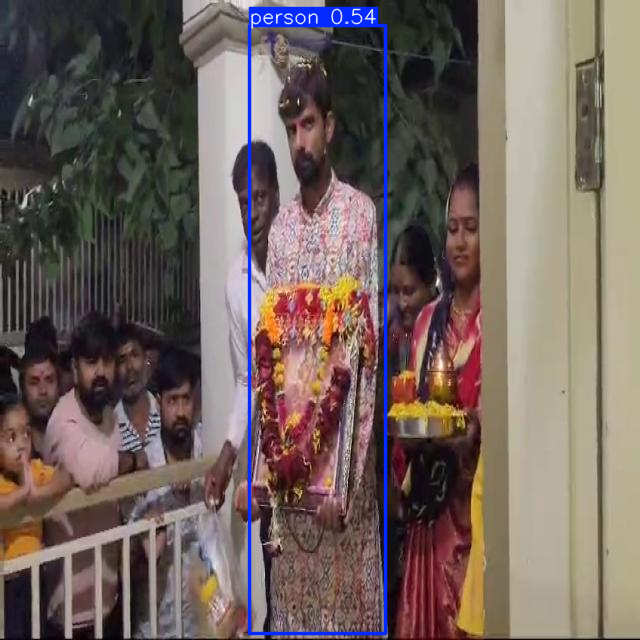

🧍 People Detected: 1
🌡️ Crowd Density: Low


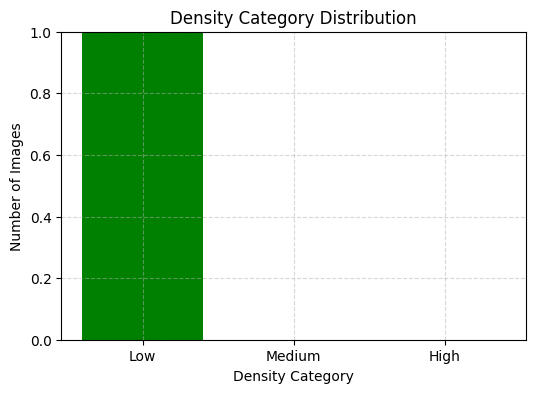

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

model = YOLO("/content/drive/MyDrive/crowd_model.pt")


def run_inference_with_plot(img_path):
    results = model(img_path)
    num_people = len(results[0].boxes)

    if num_people <= 10:
        density = "Low"
    elif num_people <= 25:
        density = "Medium"
    else:
        density = "High"

    density_counts = {"Low": 0, "Medium": 0, "High": 0}
    density_counts[density] += 1

    results[0].show()

    print(f"🧍 People Detected: {num_people}")
    print(f"🌡️ Crowd Density: {density}")

    plt.figure(figsize=(6, 4))
    plt.bar(density_counts.keys(), density_counts.values(), color=["green", "orange", "red"])
    plt.title("Density Category Distribution")
    plt.xlabel("Density Category")
    plt.ylabel("Number of Images")
    plt.ylim(0, 1)  # Since only one image is tested at a time
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

image_path = "/content/drive/MyDrive/Crowd_Density_Estimation-1/test/images/frame_84516_jpg.rf.d95b1cbeb610fe75daea451b16766295.jpg"
run_inference_with_plot(image_path)